# Lab 6
## Feature expansion and regularization in sklearn 
This lab teaches you feature expansion and regularization in sklearn


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model
from sklearn.model_selection import train_test_split, cross_val_score

## Polynomial expansion 

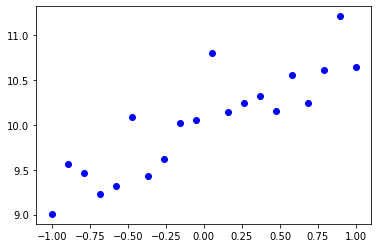

In [2]:
# Let's load a data set and look at it.
D=pd.read_csv('regression_data.csv')
plt.plot(D.x, D.y, 'bo')



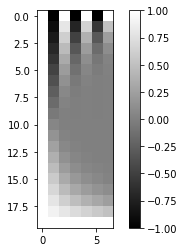

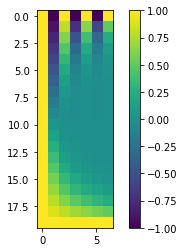

,0,1,2,3,4,5,6
0,1.0,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000
1,1.0,-0.894737,0.800554,-0.716285,0.640887,-0.573425,0.513064
2,1.0,-0.789474,0.623269,-0.492054,0.388464,-0.306682,0.242117
3,1.0,-0.684211,0.468144,-0.320309,0.219159,-0.149951,0.102598
4,1.0,-0.578947,0.335180,-0.194052,0.112346,-0.065042,0.037656


In [3]:
# Build a design matrix with polynomial expansion on X
x=D.x.values
x=x.reshape(-1,1)
poly = sk.preprocessing.PolynomialFeatures(6)
X = poly.fit_transform(x)
plt.imshow(X, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(X)
plt.colorbar()
plt.show()

XDF = pd.DataFrame(X)
XDF.head()

In [4]:
## Apply Ridge regression 

(7,)


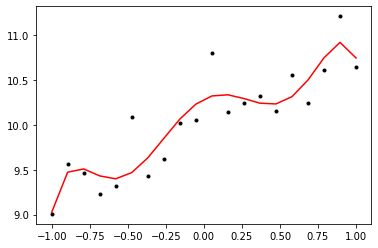

In [5]:
# Now fit a standard linear model to the data and plot prediction 
reg = sk.linear_model.LinearRegression(fit_intercept=False)
reg.fit(X,D.y)
yp=reg.predict(X)
print(reg.coef_.shape)
plt.plot(x,D.y,'k.',x,yp,'r-')

(7,)


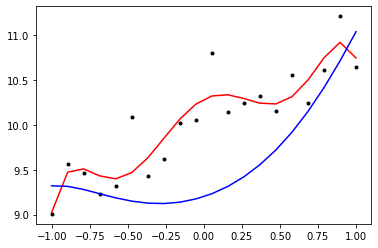

In [6]:
# This seems very wiggly. Could we do better with Ridge regression? 
# Let's regulatrize a lot
print(reg.coef_.shape)

ridge = sk.linear_model.Ridge(alpha=1.0,fit_intercept=False)
ridge.fit(X,D.y)
ypp=ridge.predict(X)
plt.plot(x,D.y,'k.',x,yp,'r-',x,ypp,'b-')

### Fix the intercept problem

In [7]:
# What happend? 
# The problem is that the Ridge coefficient was also applied to the intercept
# Sometimes this is desired, sometimes not. In this case we want to not to include the intercept 
# into the regressors that should be regularized 
poly = sk.preprocessing.PolynomialFeatures(6,include_bias=0)
X = poly.fit_transform(x)
scaler = sk.preprocessing.StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)
pd.DataFrame(X).head()
#plt.imshow(X)
#plt.colorbar()

,0,1,2,3,4,5
0,-1.647509,1.923876,-2.288395,2.354589,-2.625946,2.598636
1,-1.474087,1.316336,-1.639144,1.236850,-1.505783,1.034603
2,-1.300665,0.776301,-1.126015,0.451184,-0.805330,0.164323
3,-1.127243,0.303770,-0.732994,-0.075777,-0.393763,-0.283812
4,-0.953821,-0.101257,-0.444067,-0.408233,-0.170797,-0.492405


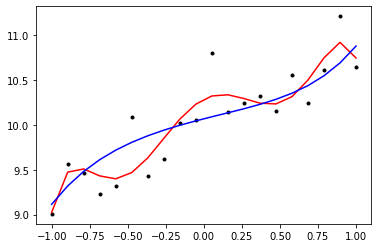

In [8]:
# If we set fit_intercept = True, ridge regression fits the intercept 
ridge = sk.linear_model.Ridge(alpha=5.0,fit_intercept=True)
ridge.fit(X,D.y)
ypp=ridge.predict(X)
plt.plot(x,D.y,'k.',x,yp,'r-',x,ypp,'b-')

In [9]:
# Also redo the linear regression 
reg = sk.linear_model.LinearRegression(fit_intercept=True)
reg.fit(X,D.y)

LinearRegression()

In [10]:
# Now inspect the coefficients: No explicit intercept is fitted - ridge coefficients are smaller 
(reg.coef_,ridge.coef_)

(array([ 0.5259425 , -1.22248473, -0.14851093,  2.98075495,  0.12675624,
        -1.85398615]),
 array([ 0.26264477, -0.03604224,  0.12595432,  0.01336734,  0.06098453,
        -0.0009332 ]))

In [11]:
# Now let's try a lower alpha (i.e. regularization coefficient) 

### How to set the regularization coefficent? 

In [12]:
# So, how should we tune the regularization coefficient? 
# Let's use crossvalidation 
cv_scores = cross_val_score(sk.linear_model.LinearRegression(), X, D.y,cv=5,scoring = 'neg_mean_squared_error')
-cv_scores

array([2.59262227e+02, 2.40636938e-01, 9.21051190e-02, 1.01115077e-01,
       7.09633014e+01])

In [13]:
# Systematically vary the ridge coeficient on a log-scale
# Systematically vary the ridge coeficient on a log-scale
lam = np.exp(np.linspace(-4,2,10))
mse = np.zeros(10)
for i in range(lam.size):
    cv_scores = cross_val_score(sk.linear_model.Ridge(alpha=lam[i]), X, D.y,cv=5,scoring = 'neg_mean_squared_error')
    mse[i]=-cv_scores.mean()

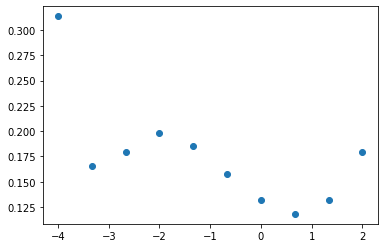

In [14]:
# Determine lowest value 
plt.scatter(np.log(lam),mse)

In [15]:
# So low let's look at the crossvalidation error for the best setting of lambda 
cv_scores = cross_val_score(sk.linear_model.Ridge(alpha=np.exp(0.8)), X, D.y,cv=5)
-cv_scores.mean()

0.44321769965160895

### Written Question
can we use this crossvalidated error as a prediction for the test error? 

### Lasso 

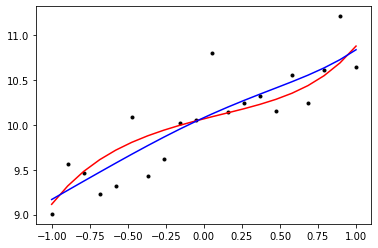

In [16]:
las = sk.linear_model.Lasso(alpha=0.005,fit_intercept=True)
las.fit(X,D.y)
yl=las.predict(X)
plt.plot(x,D.y,'k.',x,ypp,'r-',x,yl,'b-')

In [17]:
# Let's check the coefficients. What do you notice compared to the ridge? 
(ridge.coef_,las.coef_)

(array([ 0.26264477, -0.03604224,  0.12595432,  0.01336734,  0.06098453,
        -0.0009332 ]),
 array([ 0.47117248, -0.06577209,  0.        ,  0.0393283 ,  0.02196659,
         0.        ]))

### Lasso Path 

c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass eps=0.005 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


minmum regularization parameter : 0.002471599343552048
maximum regularization parameter : 0.49431986871040934


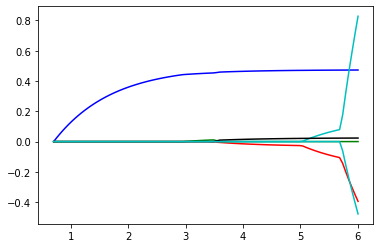

In [18]:
# Get a full path for Lasso
eps = 5e-3 # The smaller eps, the longer the path  
lambda_lasso, coefs_lasso, _ = sk.linear_model.lasso_path(X, D.y, eps, n_alphas=100, alphas= None, fit_intercept=False)

print(f"minmum regularization parameter : {np.amin(lambda_lasso)}")
print(f"maximum regularization parameter : {np.amax(lambda_lasso)}")
#plt.plot(lambda_lasso)


colors = ['b', 'r', 'g', 'c', 'k','c']
neg_log_lambda = -np.log(lambda_lasso)
for i in range(6):
    l1 = plt.plot(neg_log_lambda, coefs_lasso[i,], c=colors[i])
